In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# A simple example of clustering

In [2]:
df_example = pd.read_csv('clustering-example.csv')

In [3]:
stl_leaders = df_example[0:5]
blk_leaders = df_example[5:]

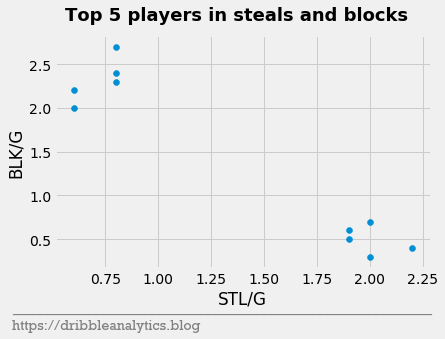

In [4]:
plt.style.use('fivethirtyeight')

stl_blk, ax = plt.subplots()

ax.scatter(df_example['STL'], df_example['BLK'])

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk.suptitle("Top 5 players in steals and blocks", weight = 'bold', size = 18)

stl_blk.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

stl_blk.text(x = -0.02, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

stl_blk.savefig('stl-blk.png', dpi = 400, bbox_inches = 'tight')

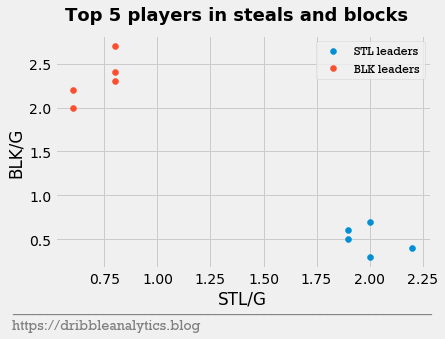

In [5]:
plt.style.use('fivethirtyeight')

stl_blk_separated, ax = plt.subplots()

ax.scatter(stl_leaders['STL'], stl_leaders['BLK'], label = 'STL leaders')
ax.scatter(blk_leaders['STL'], blk_leaders['BLK'], label = 'BLK leaders')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk_separated.suptitle("Top 5 players in steals and blocks", weight = 'bold', size = 18)

stl_blk_separated.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

stl_blk_separated.text(x = -0.02, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

stl_blk_separated.savefig('stl-blk-separated.png', dpi = 400, bbox_inches = 'tight')

In [6]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

x = np.column_stack((df_example['STL'], df_example['BLK']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

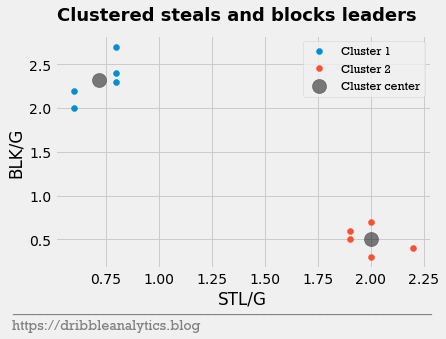

In [7]:
plt.style.use('fivethirtyeight')

stl_blk_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 0):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk_clustered.suptitle("Clustered steals and blocks leaders", weight = 'bold', size = 18)

stl_blk_clustered.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

stl_blk_clustered.text(x = -0.02, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

stl_blk_clustered.savefig('stl-blk-clustered.png', dpi = 400, bbox_inches = 'tight')

Let's add a couple more features to this to see how we can differentiate the players differently

In [8]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

x = np.column_stack((df_example['PTS'], df_example['TRB'], df_example['AST'], df_example['STL'], df_example['BLK']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [9]:
for i, j in zip(df_example['Player'], y_kmeans):
    print(i, j)

Paul George 1
James Harden 1
Chris Paul 0
Jimmy Butler 0
Russell Westbrook 1
Myles Turner 0
Mitchell Robinson 0
Rudy Gobert 0
Brook Lopez 0
JaVale McGee 0


When we add other features to the cluster, the model clusters superstars together

# Let's cluster the top 50 players in PPG

In [10]:
df_counting = pd.read_csv('counting-stats.csv')
df_advanced = pd.read_csv('advanced-stats.csv')

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 98)

x = np.column_stack((df_counting['PTS'], df_advanced['USG%']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [12]:
for i, j in zip(df_counting['Player'], y_kmeans):
    print(i, j)

James Harden 2
Paul George 1
Giannis Antetokounmpo 1
Joel Embiid 1
Stephen Curry 1
Kawhi Leonard 1
Devin Booker 1
Kevin Durant 1
Damian Lillard 1
Bradley Beal 1
Kemba Walker 1
Blake Griffin 1
Karl-Anthony Towns 1
Kyrie Irving 1
Donovan Mitchell 1
Zach LaVine 1
Russell Westbrook 1
Klay Thompson 0
Julius Randle 0
LaMarcus Aldridge 0
Jrue Holiday 0
DeMar DeRozan 0
Luka Doncic 1
Mike Conley 0
D'Angelo Russell 1
CJ McCollum 0
Nikola Vucevic 0
Buddy Hield 0
Nikola Jokic 0
Tobias Harris 0
Lou Williams 1
Danilo Gallinari 0
John Collins 0
Trae Young 0
Jimmy Butler 0
Kyle Kuzma 0
Khris Middleton 0
Jamal Murray 0
Andrew Wiggins 0
J.J. Redick 0
Tim Hardaway 0
Bojan Bogdanovic 0
Andre Drummond 0
De'Aaron Fox 0
Ben Simmons 0
Pascal Siakam 0
Spencer Dinwiddie 0
Jordan Clarkson 0
Collin Sexton 0
Clint Capela 0


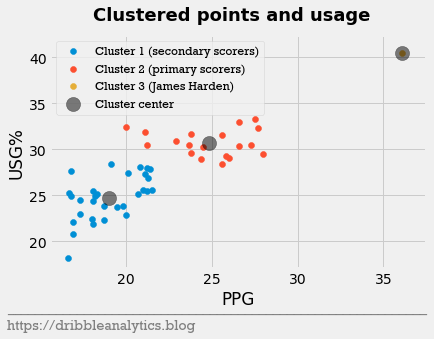

In [13]:
plt.style.use('fivethirtyeight')

pts_usg_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 0):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 2):
        cluster_3.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1 (secondary scorers)")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2 (primary scorers)")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Cluster 3 (James Harden)")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('USG%')

pts_usg_clustered.suptitle("Clustered points and usage", weight = 'bold', size = 18)

pts_usg_clustered.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

pts_usg_clustered.text(x = -0.02, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

pts_usg_clustered.savefig('pts-usg-clustered.png', dpi = 400, bbox_inches = 'tight')

In [14]:
kmeans = KMeans(n_clusters = 4, random_state = 99)

x = np.column_stack((df_counting['AST'], df_advanced['USG%']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [15]:
for i, j in zip(df_counting['Player'], y_kmeans):
    print(i, j)

James Harden 3
Paul George 0
Giannis Antetokounmpo 0
Joel Embiid 0
Stephen Curry 0
Kawhi Leonard 0
Devin Booker 0
Kevin Durant 0
Damian Lillard 0
Bradley Beal 0
Kemba Walker 0
Blake Griffin 0
Karl-Anthony Towns 0
Kyrie Irving 0
Donovan Mitchell 0
Zach LaVine 0
Russell Westbrook 0
Klay Thompson 1
Julius Randle 1
LaMarcus Aldridge 1
Jrue Holiday 1
DeMar DeRozan 1
Luka Doncic 0
Mike Conley 1
D'Angelo Russell 0
CJ McCollum 1
Nikola Vucevic 1
Buddy Hield 1
Nikola Jokic 1
Tobias Harris 2
Lou Williams 0
Danilo Gallinari 2
John Collins 2
Trae Young 0
Jimmy Butler 2
Kyle Kuzma 2
Khris Middleton 1
Jamal Murray 1
Andrew Wiggins 2
J.J. Redick 2
Tim Hardaway 1
Bojan Bogdanovic 2
Andre Drummond 2
De'Aaron Fox 1
Ben Simmons 1
Pascal Siakam 2
Spencer Dinwiddie 1
Jordan Clarkson 1
Collin Sexton 1
Clint Capela 2


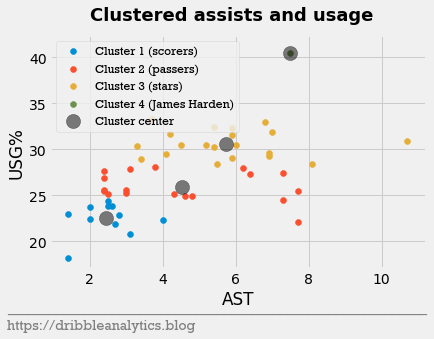

In [16]:
plt.style.use('fivethirtyeight')

ast_usg_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 2):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 0):
        cluster_3.append(x[i])
    elif(y_kmeans[i] == 3):
        cluster_4.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)
cluster_4 = np.vstack(cluster_4)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1 (scorers)")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2 (passers)")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Cluster 3 (stars)")
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], label = "Cluster 4 (James Harden)")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('AST')
ax.set_ylabel('USG%')

ast_usg_clustered.suptitle("Clustered assists and usage", weight = 'bold', size = 18)

ast_usg_clustered.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ast_usg_clustered.text(x = -0.02, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

ast_usg_clustered.savefig('ast-usg-clustered.png', dpi = 400, bbox_inches = 'tight')

# Now let's cluster NBA rotation players

In [17]:
df_full_nba = pd.read_csv('full-nba-data.csv')

In [18]:
df_full_nba.head()

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,James Harden,1,29,HOU,78,2867,36.8,10.8,24.5,0.442,...,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9
1,Paul George,2,28,OKC,77,2841,36.9,9.2,21.0,0.438,...,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3
2,Giannis Antetokounmpo,3,24,MIL,72,2358,32.8,10.0,17.3,0.578,...,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6
3,Joel Embiid,3,24,PHI,64,2154,33.7,9.1,18.7,0.484,...,13.2,33.3,4.9,3.8,8.7,0.194,2.0,2.1,4.1,3.3
4,LeBron James,2,34,LAL,55,1937,35.2,10.1,19.9,0.510,...,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9


In [19]:
df_full_nba.columns.values

array(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'MPG', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'], dtype=object)

In [20]:
features = ['Pos', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
            'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
            'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [21]:
x = df_full_nba.loc[:, features].values

x = StandardScaler().fit_transform(x)

In [22]:
pca_list = []

for n_components in range(2, 11):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.6333520677285178
For n_components = 3, explained variance ratio is 0.7178334942616982
For n_components = 4, explained variance ratio is 0.7814588277173941
For n_components = 5, explained variance ratio is 0.8295121022750755
For n_components = 6, explained variance ratio is 0.8585807560284048
For n_components = 7, explained variance ratio is 0.8810612591907596
For n_components = 8, explained variance ratio is 0.9016774045359962
For n_components = 9, explained variance ratio is 0.9192163824381704
For n_components = 10, explained variance ratio is 0.9327924287737549


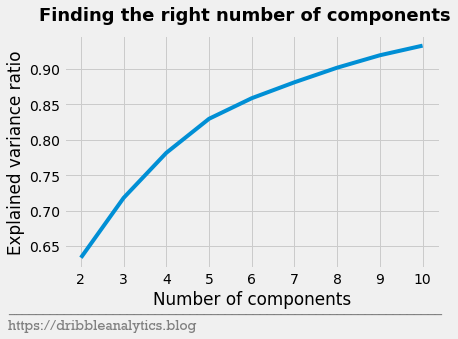

In [23]:
plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 11), pca_list)

ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance ratio')

ax.set_xticks(np.arange(2, 11, 1.0))

pca_fig.suptitle("Finding the right number of components", weight = 'bold', size = 18)

pca_fig.text(x = -0.05, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

pca_fig.text(x = -0.05, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

pca_fig.savefig('pca-variance.png', dpi = 400, bbox_inches = 'tight')

In [24]:
from numpy import diff

dx = 1
y = pca_list
dy = diff(y)/dx
print(dy)

[0.08448143 0.06362533 0.04805327 0.02906865 0.0224805  0.02061615
 0.01753898 0.01357605]


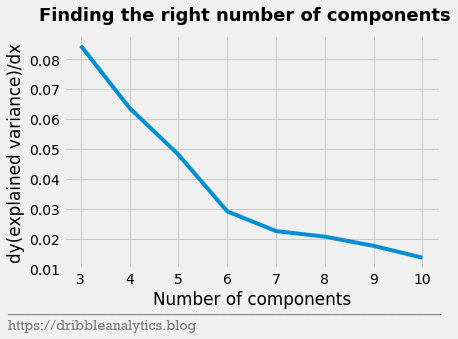

In [25]:
pca_deriv, ax = plt.subplots()

ax.plot(range(3, 11), dy)

ax.set_xlabel('Number of components')
ax.set_ylabel('dy(explained variance)/dx')

ax.set_xticks(np.arange(3, 11, 1.0))

pca_deriv.suptitle("Finding the right number of components", weight = 'bold', size = 18)

pca_deriv.text(x = -0.05, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

pca_deriv.text(x = -0.05, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

pca_deriv.savefig('pca-deriv.png', dpi = 400, bbox_inches = 'tight')

In [26]:
pca = PCA(n_components = 6)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])

pca_df['Player'] = df_full_nba['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6']]

In [27]:
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,James Harden,12.480375,11.488923,-3.046188,2.799767,-0.274446,0.950593
1,Paul George,7.645584,6.583040,-1.620042,2.119232,-2.979916,-0.956373
2,Giannis Antetokounmpo,15.294763,1.618989,-0.298906,1.044728,0.335343,0.929695
3,Joel Embiid,11.352176,1.545779,2.224731,-3.080351,-2.747073,1.781307
4,LeBron James,8.653727,5.381184,0.464913,0.374554,1.403629,0.626366


In [28]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.4069444  0.22640766 0.08448143 0.06362533 0.04805327 0.02906865]
0.8585807560284048


In [29]:
x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'], pca_df['PC 6']))

silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3625621933699161
For n_clusters = 3, silhouette score is 0.363880453970673
For n_clusters = 4, silhouette score is 0.2614848960071128
For n_clusters = 5, silhouette score is 0.19815110823662838
For n_clusters = 6, silhouette score is 0.18507130884845485
For n_clusters = 7, silhouette score is 0.18636349475626024
For n_clusters = 8, silhouette score is 0.18664107207762115
For n_clusters = 9, silhouette score is 0.17714484004192274
For n_clusters = 10, silhouette score is 0.18448519003695346
For n_clusters = 11, silhouette score is 0.17074323527296992
For n_clusters = 12, silhouette score is 0.18449812233181384
For n_clusters = 13, silhouette score is 0.18814537663455563
For n_clusters = 14, silhouette score is 0.1722447360305935
For n_clusters = 15, silhouette score is 0.16959941465780093
For n_clusters = 16, silhouette score is 0.16224502109032346
For n_clusters = 17, silhouette score is 0.1723940903772681
For n_clusters = 18, silhouette score 

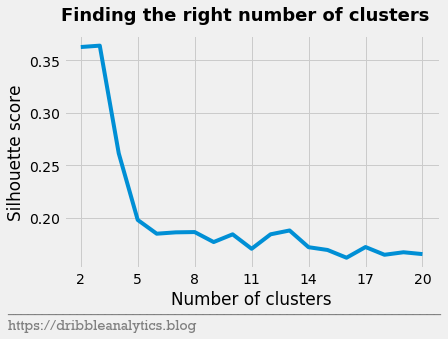

In [30]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 21), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 3.0))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

silhouette_fig.text(x = -0.05, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

silhouette_fig.text(x = -0.05, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

silhouette_fig.savefig('silhouette-score.png', dpi = 400, bbox_inches = 'tight')

In [31]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = 0.002068061522309317
For n_cluster = 4, percent improvement = -0.16096904835375003
For n_cluster = 5, percent improvement = -0.08575828365332172
For n_cluster = 6, percent improvement = -0.01631205021610671
For n_cluster = 7, percent improvement = 0.001585642918007335
For n_cluster = 8, percent improvement = 0.00034115642497845045
For n_cluster = 9, percent improvement = -0.01167532771780766
For n_cluster = 10, percent improvement = 0.008920585726660213
For n_cluster = 11, percent improvement = -0.016850650161223113
For n_cluster = 12, percent improvement = 0.016587006152879225
For n_cluster = 13, percent improvement = 0.004472404543286457
For n_cluster = 14, percent improvement = -0.019585576218126288
For n_cluster = 15, percent improvement = -0.003195777167404934
For n_cluster = 16, percent improvement = -0.008856440731489723
For n_cluster = 17, percent improvement = 0.012114603365477317
For n_cluster = 18, percent improvement = -0.00887604551

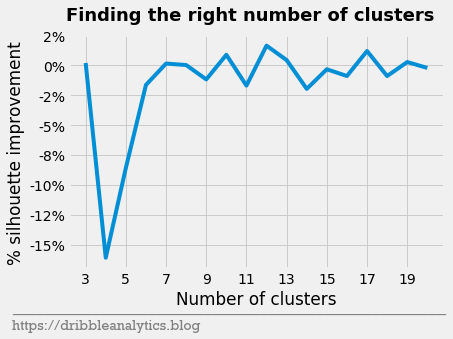

In [32]:
plt.style.use('fivethirtyeight')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

silhouette_imp_fig.text(x = -0.05, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

silhouette_imp_fig.text(x = -0.05, y = -.14,
    s = 'https://dribbleanalytics.blog                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

silhouette_imp_fig.savefig('silhouette-diff-score.png', dpi = 400, bbox_inches = 'tight')

In [33]:
kmeans = KMeans(n_clusters = 12, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [34]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = df_full_nba['Player']
df_cluster['Cluster'] = y_kmeans

df_cluster.head()

,Player,Cluster
0,James Harden,6
1,Paul George,6
2,Giannis Antetokounmpo,4
3,Joel Embiid,4
4,LeBron James,6


In [35]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%']

def cluster_stats(cluster):
    
    print(df_full_nba[interest_stats].loc[df_cluster['Cluster'] == cluster].mean())

In [36]:
df_cluster[df_cluster['Cluster'] == 11]

,Player,Cluster
145,Marvin Williams,11
146,Kelly Olynyk,11
152,Nemanja Bjelica,11
153,Jonathan Isaac,11
155,Robin Lopez,11
157,Al-Farouq Aminu,11
158,JaMychal Green,11
159,Markieff Morris,11
161,Nicolas Batum,11
178,Rodions Kurucs,11


In [37]:
cluster_stats(11)

PTS      7.455263
TRB      4.371053
AST      1.289474
STL      0.663158
BLK      0.547368
FG%      0.459974
3P%      0.333921
FT%      0.739447
USG%    14.742105
dtype: float64


In [38]:
df_cluster[interest_stats] = df_full_nba[interest_stats]

In [39]:
df_cluster['Cluster'] = df_cluster['Cluster'] + 1

In [40]:
roles = ['3&D guard', 'Perimiter scorer', 'Rim runner', '???', 'Star big', 'Shooter', 'Star ball handler',
         'Team-leading guard', 'Do it all big', 'Floor general', 'Inside big', '3&D forward']

cluster_dict = dict(zip(list(range(1, 13)), roles))

In [41]:
df_cluster['Role'] = df_cluster['Cluster'].map(cluster_dict)

In [42]:
df_cluster.head()

,Player,Cluster,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,USG%,Role
0,James Harden,7,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,40.5,Star ball handler
1,Paul George,7,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,29.5,Star ball handler
2,Giannis Antetokounmpo,5,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,32.3,Star big
3,Joel Embiid,5,27.5,13.6,3.7,0.7,1.9,0.484,0.300,0.804,33.3,Star big
4,LeBron James,7,27.4,8.5,8.3,1.3,0.6,0.510,0.339,0.665,31.6,Star ball handler


In [43]:
df_cluster = df_cluster[['Player', 'Cluster', 'Role', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%']]
df_cluster.to_csv('clustered-nba.csv')

In [44]:
df_avg = df_cluster.groupby('Role')[interest_stats].mean()

In [45]:
df_avg

,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,USG%
Role,,,,,,,,,
3&D forward,7.455263,4.371053,1.289474,0.663158,0.547368,0.459974,0.333921,0.739447,14.742105
3&D guard,8.891176,2.444118,1.611765,0.588235,0.188235,0.435324,0.388029,0.825382,16.420588
???,9.190196,3.090196,2.509804,0.768627,0.276471,0.416706,0.324451,0.753137,18.972549
Do it all big,12.885714,6.850000,2.185714,0.978571,1.157143,0.510571,0.367357,0.742214,18.764286
Floor general,11.178571,4.200000,5.335714,1.314286,0.414286,0.443857,0.354429,0.780429,17.985714
Inside big,17.312500,9.250000,2.387500,0.687500,0.862500,0.556250,0.254000,0.750625,24.300000
Perimiter scorer,14.650000,5.863636,2.122727,0.759091,0.527273,0.456682,0.351318,0.772364,22.104545
Rim runner,9.622222,7.538889,1.338889,0.650000,1.177778,0.609500,0.094389,0.652278,16.511111
Shooter,16.729167,3.733333,3.195833,0.783333,0.258333,0.445750,0.382667,0.848292,22.975000
